# Modelo predictivo Pulsar Classification For Class Prediction

Vamos a realizar un modelo predictivo basado en redes neuronales

#### 1- Instalación de librerías necesarias

In [ ]:
# !pip install tensorflow
# pip install pandas
# pip install matplotlib
# pip install seaborn
# pip install scikit-learn

#### 2- Importamos librerias y Creación configuración básica

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix

# Configuración, colores y estilo
background_color = '#F0F0F0'  
data_colors = ['#7DB5E4', '#3B679E', '#005EB8', '#003366'] 
colormap = sns.color_palette("Blues")
sns.set(style="ticks")

epochs=10

Ejecuta la siguiente celda si quieres conocer las versiones de las librerías utiliadas, esto se ha utilizado para saber que versión tenemos que intalar en nuestro requirements.txt

In [ ]:
print("Pandas:",pd.__version__)
print("Tensorflow:",tf.__version__)
print("Matplotlib:",matplotlib.__version__)
print("Seaborn:",sns.__version__)
print("Sklearn:",sklearn.__version__)


Pandas: 2.0.3
Tensorflow: 2.13.0
Matplotlib: 3.7.2
Seaborn: 0.12.2
Sklearn: 1.3.0


#### 3- Leemos el .Csv

In [104]:
df = pd.read_csv("Pulsar.csv")

#### 4- Exploración de los datos

Vemos tipo de columnas y valores nulos

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mean_Integrated       17898 non-null  float64
 1   SD                    17898 non-null  float64
 2   EK                    17898 non-null  float64
 3   Skewness              17898 non-null  float64
 4   Mean_DMSNR_Curve      17898 non-null  float64
 5   SD_DMSNR_Curve        17898 non-null  float64
 6   EK_DMSNR_Curve        17898 non-null  float64
 7   Skewness_DMSNR_Curve  17898 non-null  float64
 8   Class                 17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


Vemos la forma del  dataframe

In [106]:
df.shape

(17898, 9)

Imprimimos los primeros valores

In [107]:
df.head()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


Vemos los valores numéricos de las columnas

In [109]:
df.describe()


,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


#### 5- Creación de funciones

In [1]:
# Función para plot de boxplots
def plot_boxplots(dataframe):
    num_columns = len(dataframe.columns) - 1
    num_rows = (num_columns + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 12))

    for i, column in enumerate(dataframe.columns[:-1]):
        row = i // 2
        col = i % 2
        ax = axes[row, col]

        sns.boxplot(data=dataframe, x=column, ax=ax, palette=data_colors)
        ax.set_title(f'Boxplot de {column}')
        ax.set_ylabel('Valores')
        fig.patch.set_facecolor(background_color)

    plt.tight_layout()
    plt.show()

# Función para heatmap de correlación
def correlation_heatmap(df):
    fig, ax = plt.subplots(figsize=(14, 12))
    mask = np.zeros_like(df.corr())
    mask[np.triu_indices_from(mask)] = True
    
    sns.heatmap(df.corr(), mask=mask, cmap=colormap, ax=ax, annot=True, linewidths=0.5)
    fig.patch.set_facecolor(background_color)
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

# Plot de distribución de clases
def plot_class_distribution(dataframe):
    fig, ax = plt.subplots()
    ax.pie(dataframe["Class"].value_counts(), labels=["Clase 0", "Clase 1"], autopct='%1.1f%%', 
           startangle=90, explode=(0.1, 0), colors=data_colors)
    ax.set_title("Distribución de Clases")
    fig.patch.set_facecolor(background_color)
    plt.show()

# Plot de pair plot
def plot_pair_plot(dataframe):
    g = sns.pairplot(dataframe, hue="Class", palette=data_colors)
    plt.title("Looking for Insights in Data")
    plt.legend(title="Class")
    plt.tight_layout()
    plt.gca().set_facecolor(background_color)
    plt.show()

# Plot para comportamiento predicción
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()


#### 6- Análisis variables

En el Gráfico de bigotes podemos ver la distribución de las variables

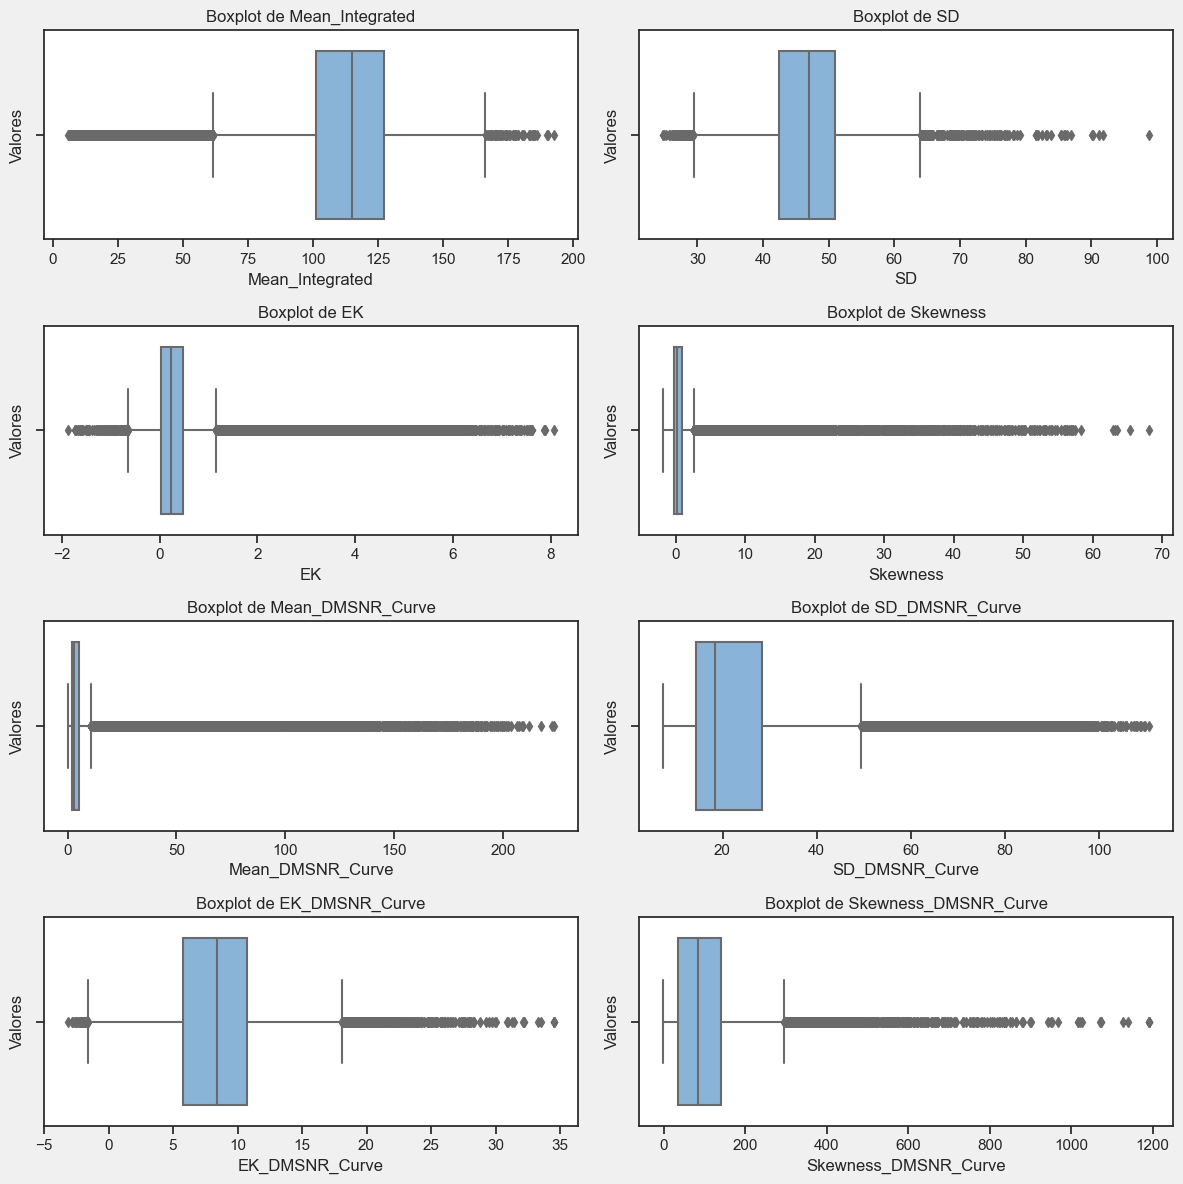

In [112]:
plot_boxplots(df)

Mapa de calor con la correlación de cada variable con la Clase

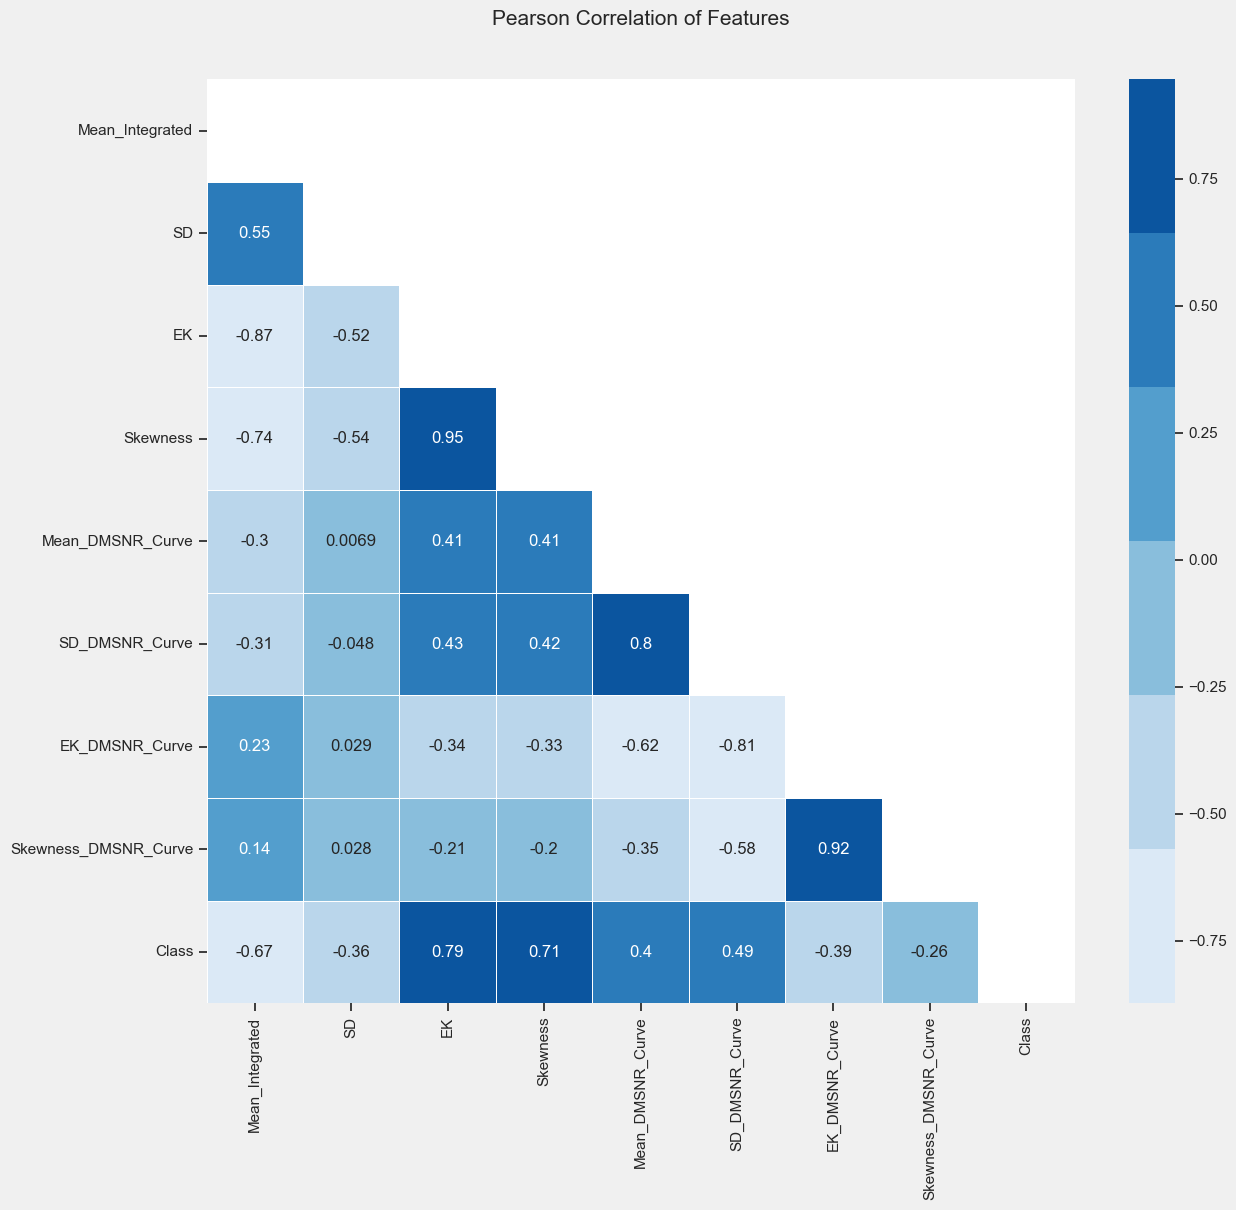

In [113]:
correlation_heatmap(df)

En el gráfico de torta vemos la distribución de la clase

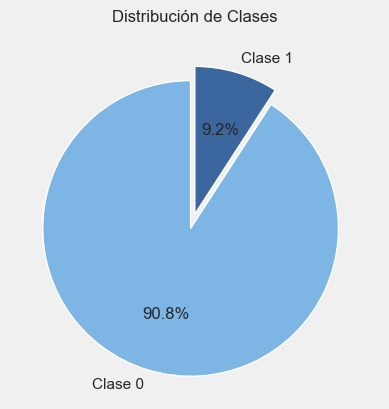

In [114]:
plot_class_distribution(df)

Podemos ver las relaciones entre todas las variables de manera que podemos identificar patrones y tendencias

c:\Users\JORGE\Desktop\Proyecto Ml Datapath\mldatapath\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\JORGE\Desktop\Proyecto Ml Datapath\mldatapath\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\JORGE\Desktop\Proyecto Ml Datapath\mldatapath\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\JORGE\Desktop\Proyecto Ml Datapath\mldatapath\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\JORGE\Desktop\Proyecto Ml Datapath\mldatapath\lib\site-packages\seaborn\axisgrid.py:1507: U

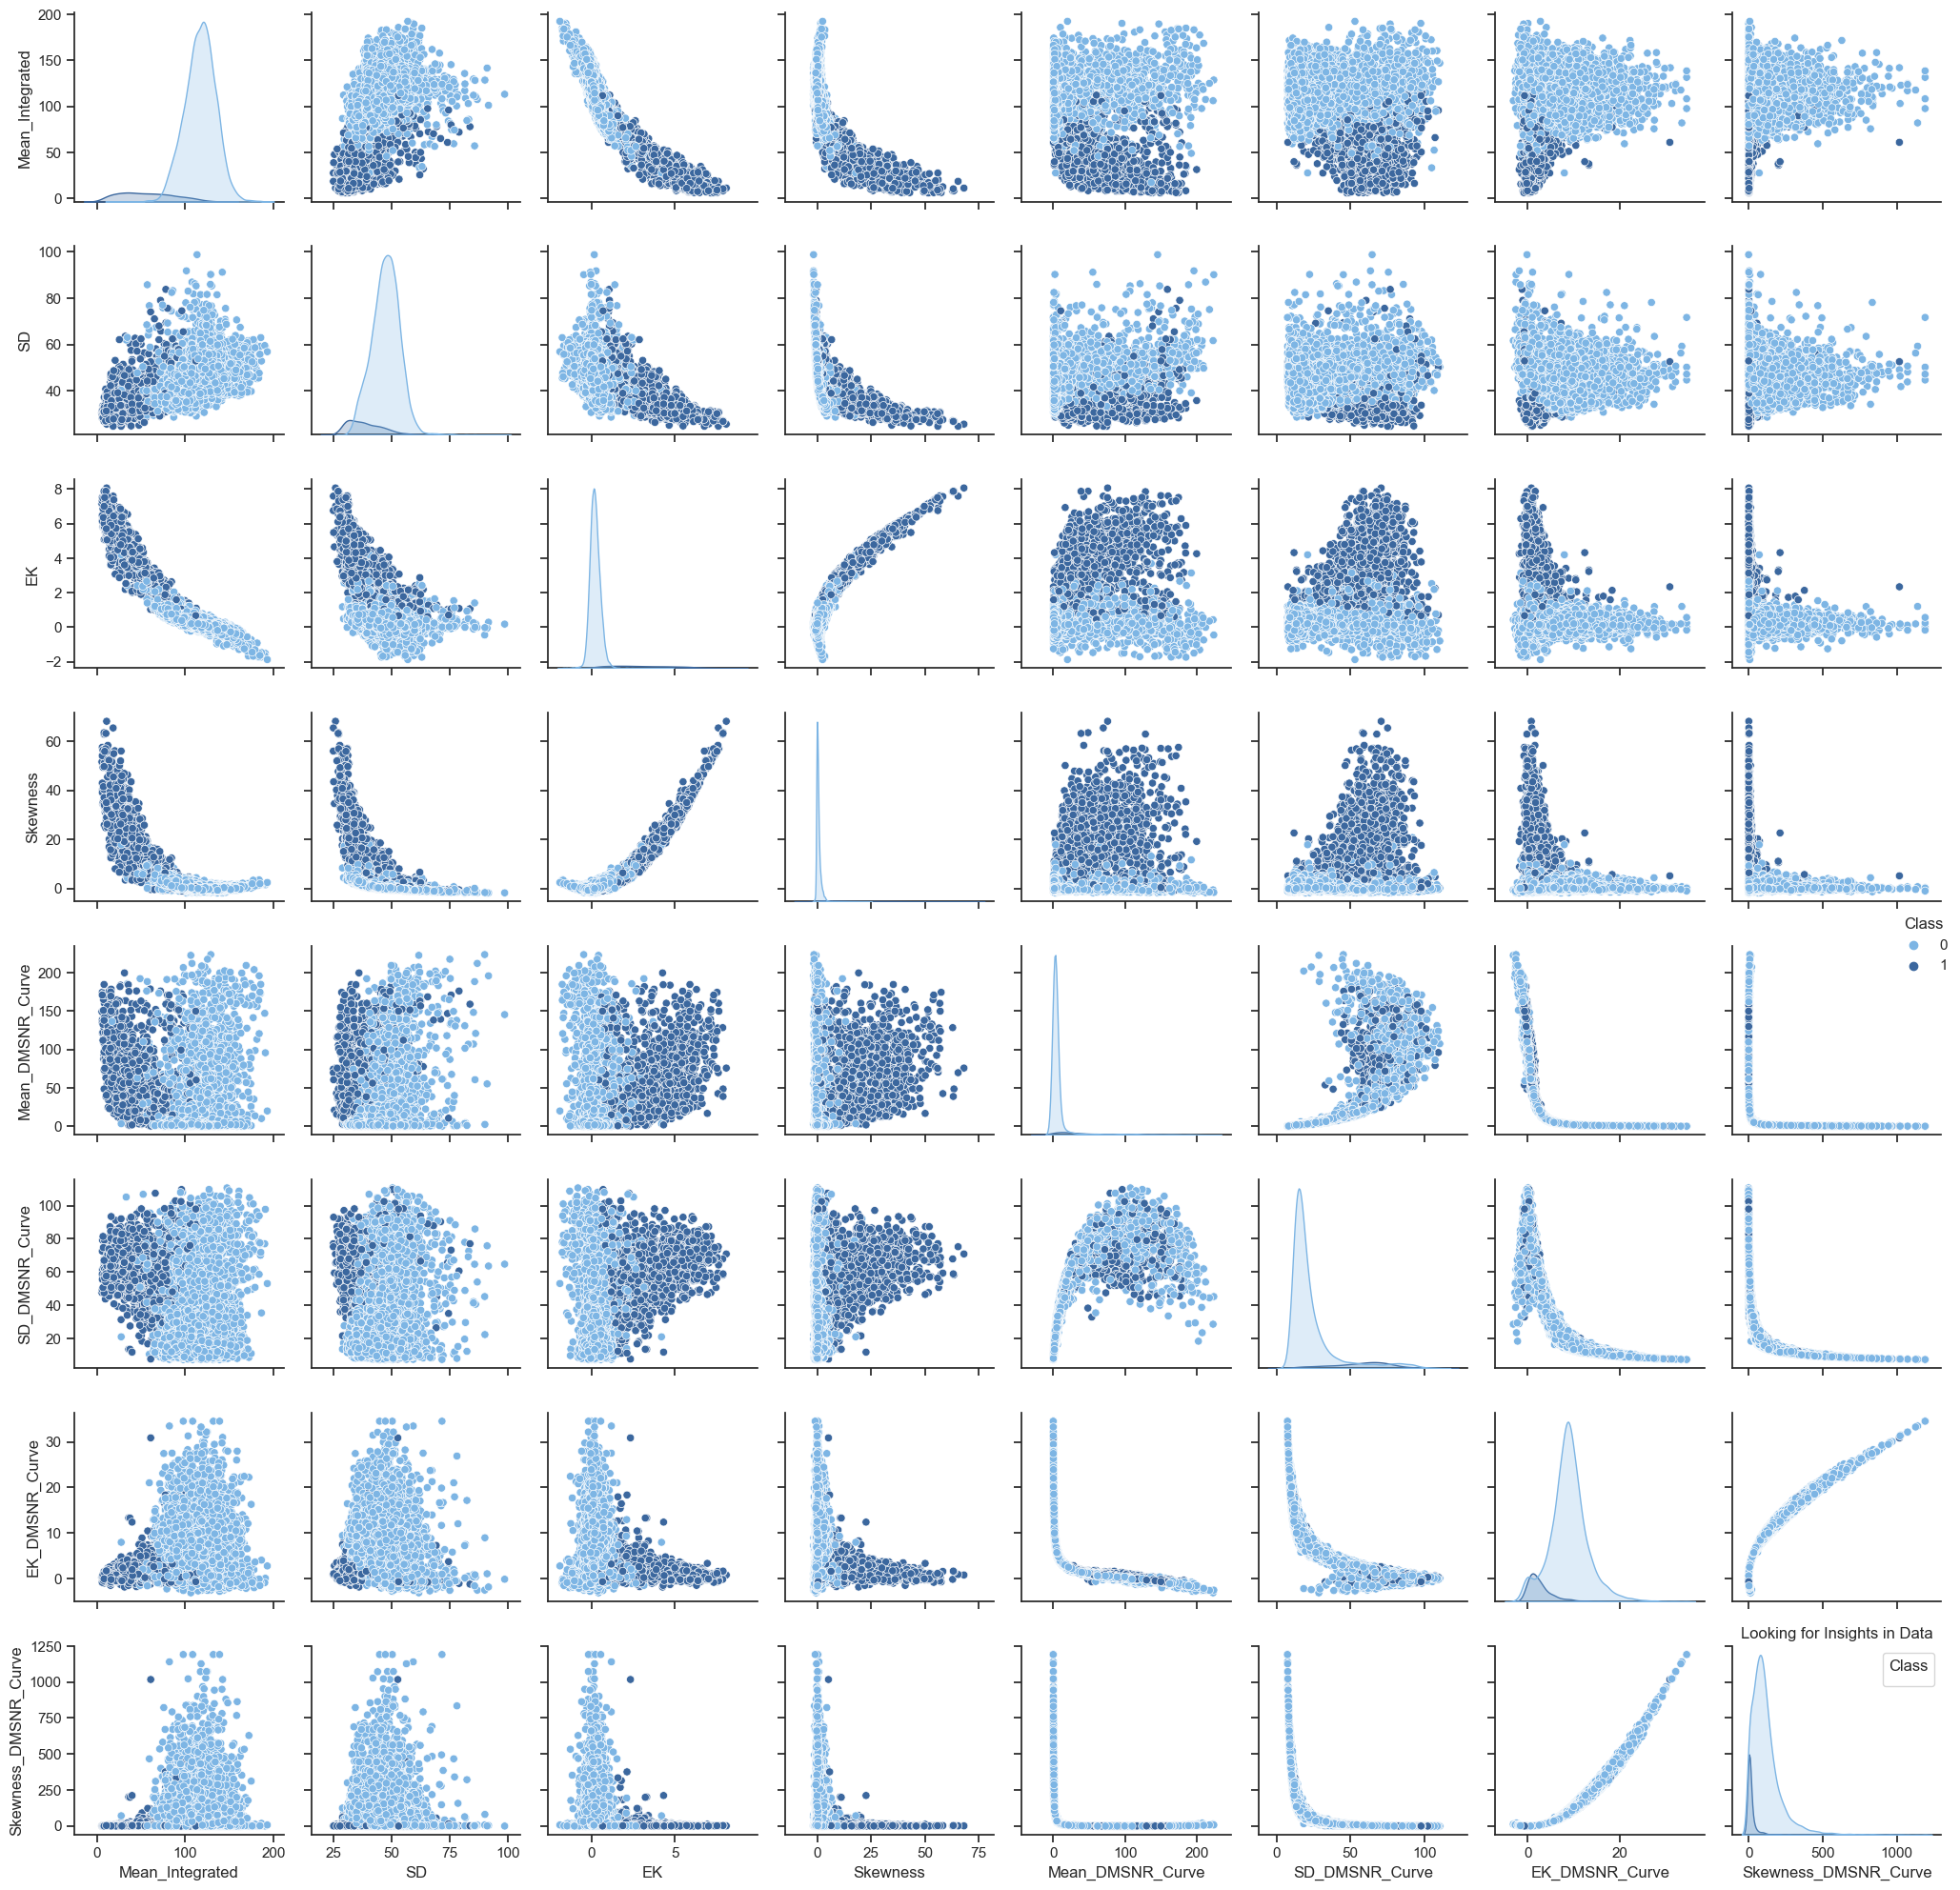

In [115]:

plot_pair_plot(df)


#### 7- Preprocesamiento y separación división de los datos en train y test

In [116]:
# Preprocesamiento y división de datos
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### 8- Creación de modelo 

In [117]:

# Crear modelo
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1])),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


#### 9- Compilación

Elegimos el optimizador Adam por que ajusta automáticamente la tasa de aprendizaje durante el entrenamiento y binary_crossentropy por que la salida es una clasificación binaria

In [118]:

# Compilar y entrenar modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=32, validation_split=0.2)


Epoch 1/10
358/358 [==============================] - 5s 8ms/step - loss: 0.1385 - accuracy: 0.9684 - val_loss: 0.0739 - val_accuracy: 0.9763
Epoch 2/10
358/358 [==============================] - 1s 4ms/step - loss: 0.0747 - accuracy: 0.9783 - val_loss: 0.0670 - val_accuracy: 0.9787
Epoch 3/10
358/358 [==============================] - 1s 4ms/step - loss: 0.0720 - accuracy: 0.9790 - val_loss: 0.0673 - val_accuracy: 0.9773
Epoch 4/10
358/358 [==============================] - 1s 4ms/step - loss: 0.0706 - accuracy: 0.9797 - val_loss: 0.0655 - val_accuracy: 0.9787
Epoch 5/10
358/358 [==============================] - 2s 4ms/step - loss: 0.0696 - accuracy: 0.9799 - val_loss: 0.0683 - val_accuracy: 0.9777
Epoch 6/10
358/358 [==============================] - 1s 4ms/step - loss: 0.0694 - accuracy: 0.9801 - val_loss: 0.0627 - val_accuracy: 0.9808
Epoch 7/10
358/358 [==============================] - 1s 4ms/step - loss: 0.0688 - accuracy: 0.9804 - val_loss: 0.0640 - val_accuracy: 0.9804
Epoch 

#### 10- Evaluación del modelo

In [119]:

# Evaluar el modelo
y_pred = model.predict(X_test_scaled)
y_pred_binary = np.round(y_pred)
accuracy1 = accuracy_score(y_test, y_pred_binary)
print("Exactitud en el conjunto de prueba:", accuracy1)



112/112 [==============================] - 0s 3ms/step
Exactitud en el conjunto de prueba: 0.9812849162011174


#### 11- Balancemaos las clases

In [120]:
# Ajuste de pesos de clase
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
print(class_weights)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelo_entrenado = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=32, 
                             validation_split=0.2, class_weight=class_weights_dict)



[0.55069231 5.43171472]
Epoch 1/10
358/358 [==============================] - 3s 5ms/step - loss: 0.1681 - accuracy: 0.9703 - val_loss: 0.1254 - val_accuracy: 0.9700
Epoch 2/10
358/358 [==============================] - 1s 4ms/step - loss: 0.1561 - accuracy: 0.9674 - val_loss: 0.1159 - val_accuracy: 0.9707
Epoch 3/10
358/358 [==============================] - 1s 4ms/step - loss: 0.1546 - accuracy: 0.9679 - val_loss: 0.1415 - val_accuracy: 0.9616
Epoch 4/10
358/358 [==============================] - 1s 4ms/step - loss: 0.1533 - accuracy: 0.9660 - val_loss: 0.1375 - val_accuracy: 0.9689
Epoch 5/10
358/358 [==============================] - 1s 4ms/step - loss: 0.1508 - accuracy: 0.9682 - val_loss: 0.1146 - val_accuracy: 0.9693
Epoch 6/10
358/358 [==============================] - 1s 4ms/step - loss: 0.1509 - accuracy: 0.9677 - val_loss: 0.1331 - val_accuracy: 0.9682
Epoch 7/10
358/358 [==============================] - 1s 4ms/step - loss: 0.1501 - accuracy: 0.9677 - val_loss: 0.1335 - val

#### 12- Evaluación con clases balanceadas

In [121]:
# Evaluar el modelo
y_pred = model.predict(X_test_scaled)
y_pred_binary = np.round(y_pred)
accuracy2 = accuracy_score(y_test, y_pred_binary)
print("Exactitud en el conjunto de prueba:", accuracy2)

112/112 [==============================] - 0s 2ms/step
Exactitud en el conjunto de prueba: 0.9600558659217877


13- Gráfico de lineas con el resultado de la resultado y la perdida

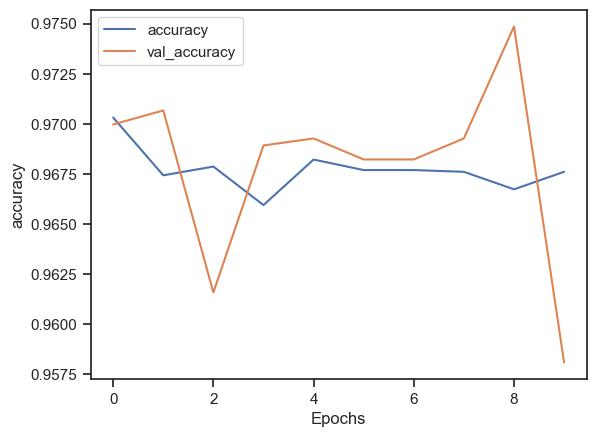

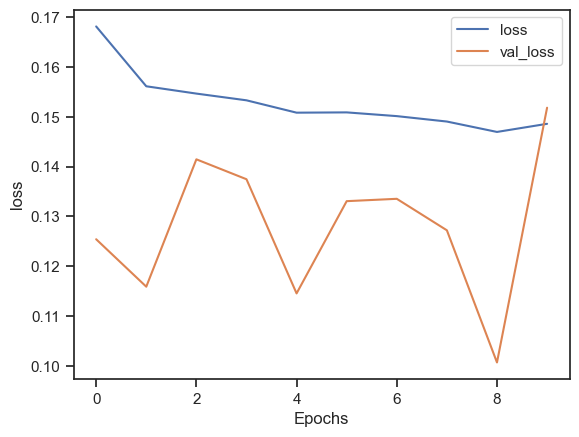

In [122]:

plot_graphs(modelo_entrenado, "accuracy")
plot_graphs(modelo_entrenado, "loss")



#### 14- Visualización matriz de confusión

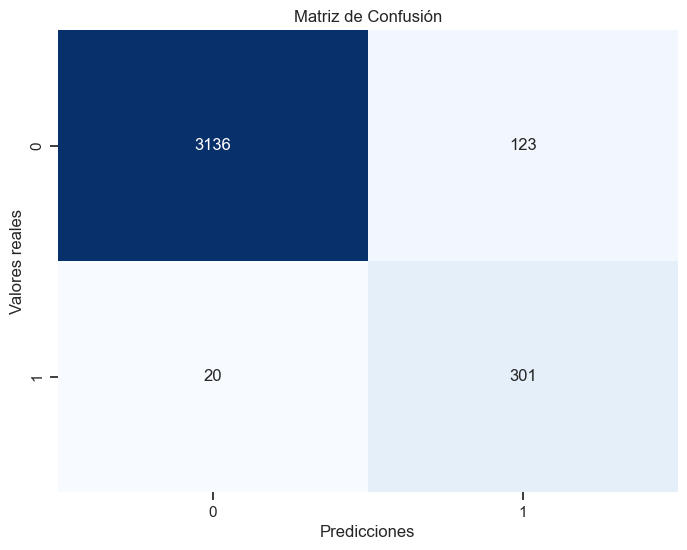

In [124]:
# Matriz de confusión
confusion = confusion_matrix(y_test, y_pred_binary)
# Plot de matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

#### 15- Descarga de modelo

In [125]:
model.save("model.h5")

c:\Users\JORGE\Desktop\Proyecto Ml Datapath\mldatapath\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [128]:
import pickle

# Guardar el objeto scaler como pickle
scaler_filename = 'scaler.pkl'
with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [139]:
valores_positivos = df[df.Class == 1].reset_index(drop=True)

In [142]:
valores_positivos.iloc[0].to_list()[:-1]

[99.3671875,
 41.57220208,
 1.547196967,
 4.154106043,
 27.55518395,
 61.71901588,
 2.20880796,
 3.662680136]

In [134]:
df.iloc[0].to_list()[:-1]

[140.5625,
 55.68378214,
 -0.234571412,
 -0.699648398,
 3.199832776,
 19.11042633,
 7.975531794,
 74.24222492]